# Import all python library

In [1]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib
import matplotlib.pyplot as plt
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\prith\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Load dataset

In [ ]:
 df = pd.read_csv("C:/Users/prith/OneDrive/Desktop/M7/Language Detection.csv")
print(df.head())

                                                Text  Language Recognition.  \
0   Nature, in the broadest sense, is the natural...                English   
1  "Nature" can refer to the phenomena of the phy...                English   
2  The study of nature is a large, if not the onl...                English   
3  Although humans are part of nature, human acti...                English   
4  [1] The word nature is borrowed from the Old F...                English   

  Unnamed: 2 Unnamed: 3 Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7  \
0        NaN        NaN        NaN        NaN        NaN        NaN   
1        NaN        NaN        NaN        NaN        NaN        NaN   
2        NaN        NaN        NaN        NaN        NaN        NaN   
3        NaN        NaN        NaN        NaN        NaN        NaN   
4        NaN        NaN        NaN        NaN        NaN        NaN   

  Unnamed: 8 Unnamed: 9 Unnamed: 10 Unnamed: 11 Unnamed: 12 Unnamed: 13  \
0        NaN        NaN

# Clean column names, Define a text cleaning function,  Apply the cleaning function, 

In [ ]:

df.columns = df.columns.str.strip()


def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)      # Remove digits
    return text


df['clean_text'] = df['Text'].apply(clean_text)
df['clean_text'] = df['clean_text'].fillna('')

 # Handle missing values

In [ ]:
df['Language Recognition.'] = df['Language Recognition.'].fillna('Unknown')

# NLP Preprocessing and Model Prep like Tokenization, TF-IDF Vectorization,  Target Variable

In [ ]:
df['tokens'] = df['clean_text'].apply(word_tokenize)


vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['clean_text'])
print(" Vocabulary sample:", vectorizer.get_feature_names_out()[:10])



y = df['Language Recognition.']


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 Vocabulary sample: ['aan' 'aanbieden' 'aanbiedingen' 'aandacht' 'aangeboden' 'aangenaam'
 'aangepast' 'aangeslagen' 'aangetroffen' 'aangezien']


# To evaluate the model

In [ ]:
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

 # Predictions

In [ ]:

y_pred = model.predict(x_test)
y_pred

array(['Russian', 'Russian', 'English', ..., 'German', 'English',
       'English'], dtype='<U2035')

# Evaluation

In [ ]:
print("\n Accuracy:", accuracy_score(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))


 Accuracy: 0.9381044487427466

 Confusion Matrix:
 [[100   0   0   5   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  60   0   6   1   0   0   0   0   0   0   0   0   0   4   0   0]
 [  0   0  97   7   1   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 291   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   1 218   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   4   0  83   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   8   0   0  57   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   7   0   0   0   0   0   0   0   3   0]
 [  0   0   0   8   2   0   0   0 134   0   0   0   0   0   0   0   0]
 [  0   0   0   5   0   0   0   0   0  80   0   0   0   0   0   0   0]
 [  0   0   0  13   0   0   0   0   0   0 107   0   0   0   0   1   0]
 [  0   0   0   3   0   0   0   0   0   0   0 138   0   3   0   0   0]
 [  0   0   0   8   0   0   0   0   0   0   0   0 130   0   0   0   0]
 [  0   0   0   5   1   0

# Dataset overview

In [ ]:
print("\n Dataset Head:\n", df.head())
print("\n Dataset Info:")
df.info()
print("\n Null values:\n", df.isnull().sum())
print("\n Language Distribution:\n", df['Language Recognition.'].value_counts())


 Dataset Head:
                                                 Text Language Recognition.  \
0   Nature, in the broadest sense, is the natural...               English   
1  "Nature" can refer to the phenomena of the phy...               English   
2  The study of nature is a large, if not the onl...               English   
3  Although humans are part of nature, human acti...               English   
4  [1] The word nature is borrowed from the Old F...               English   

  Unnamed: 2 Unnamed: 3 Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7  \
0        NaN        NaN        NaN        NaN        NaN        NaN   
1        NaN        NaN        NaN        NaN        NaN        NaN   
2        NaN        NaN        NaN        NaN        NaN        NaN   
3        NaN        NaN        NaN        NaN        NaN        NaN   
4        NaN        NaN        NaN        NaN        NaN        NaN   

  Unnamed: 8 Unnamed: 9  ... Unnamed: 12 Unnamed: 13 Unnamed: 14 Unnamed: 15  \
0      

In [8]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


# Create a WordCloud Chart

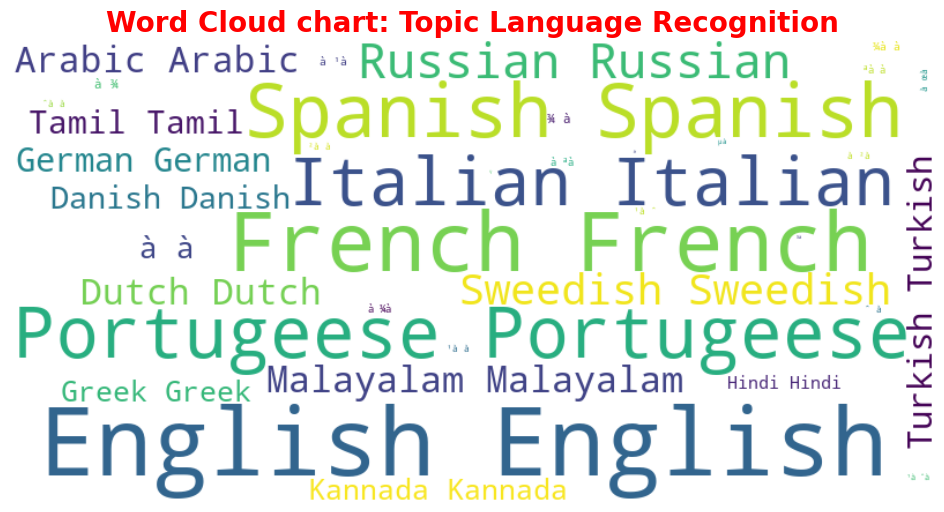

In [ ]:
text = ' '.join(df['Language Recognition.'].tolist())


wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)


plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')


plt.title("Word Cloud chart: Topic Language Recognition", color='red', fontsize=20, fontweight='bold')

plt.show()



# Create TI-IDF Chart

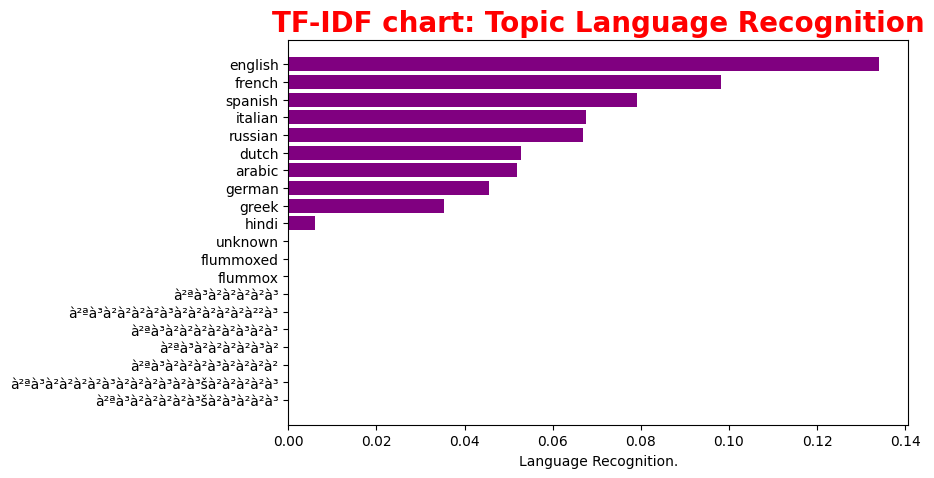

In [ ]:
X_tfidf = vectorizer.transform(df['Language Recognition.'])


tfidf_means = np.mean(X_tfidf.toarray(), axis=0)


feature_names = vectorizer.get_feature_names_out()

tfidf_scores = pd.DataFrame({'feature': feature_names, 'tfidf': tfidf_means})


top_tfidf = tfidf_scores.sort_values(by='tfidf', ascending=False).head(20)


plt.figure(figsize=(8,5))
plt.barh(top_tfidf['feature'][::-1], top_tfidf['tfidf'][::-1], color='purple')
plt.xlabel("Language Recognition.")


plt.title("TF-IDF chart: Topic Language Recognition", color='red', fontsize=20, fontweight='bold')

plt.show()
